In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate

def embed_ts(array_ts, N, L, K):
    embed_matrix = np.zeros([L, K])
    for k in range(L):
        embed_matrix[k,:] = array_ts[k:k+K]
    return embed_matrix

def deembed_ts(matrix_embed, N, L, K):
    recon_ts = np.zeros(N)
    for n in range(N):
        recon_ts[n] = np.mean(np.fliplr(matrix_embed).diagonal(offset = K-n-1)) #THIS IS THE CORRECT ALGORITHM !!!!!!!!
    return recon_ts

In [2]:
calicut_temp = [] = []
calicut_iso_time = []
calicut_time = []
PATH = "../../CLIMATE_DATA/CALICUT/"
for year in range(1980,2022):
    fname = "temp_"+str(year)+".csv" 
    f = open(PATH+fname, 'r')
    for line in f:
        line = line.strip()
        line = line.split()
        temp = float(line[1].split(",")[0])/10
        if temp < 800:
            calicut_iso_time = np.append(calicut_iso_time, datetime.datetime.fromisoformat(line[0]))
            calicut_time = np.append(calicut_time, datetime.datetime.fromisoformat(line[0]).timestamp())
            calicut_temp = np.append(calicut_temp, temp)

In [3]:
Ndays = int((np.max(calicut_time) - np.min(calicut_time))/(86400))

binned_times = np.linspace(np.min(calicut_time), np.min(calicut_time)+(Ndays*86400), Ndays)
binned_iso_time = []
temp_interp = interpolate.interp1d(calicut_time, calicut_temp)
inter_ctemp = temp_interp(binned_times)

for time in binned_times:
    binned_iso_time = np.append(binned_iso_time, datetime.datetime.fromtimestamp(time))

In [4]:
N = len(binned_times)
L = 365

K = N-L+1
X_auto11 = embed_ts(inter_ctemp, N=N, L=L, K=K)
u, s, vh = np.linalg.svd(X_auto11, full_matrices=False)
compon_0 = deembed_ts(np.matmul(np.expand_dims(u[:,0], axis=1), np.expand_dims(vh[0,:], axis=0)), N=N, L=L, K=K)*s[0]


(20.0, 40.0)

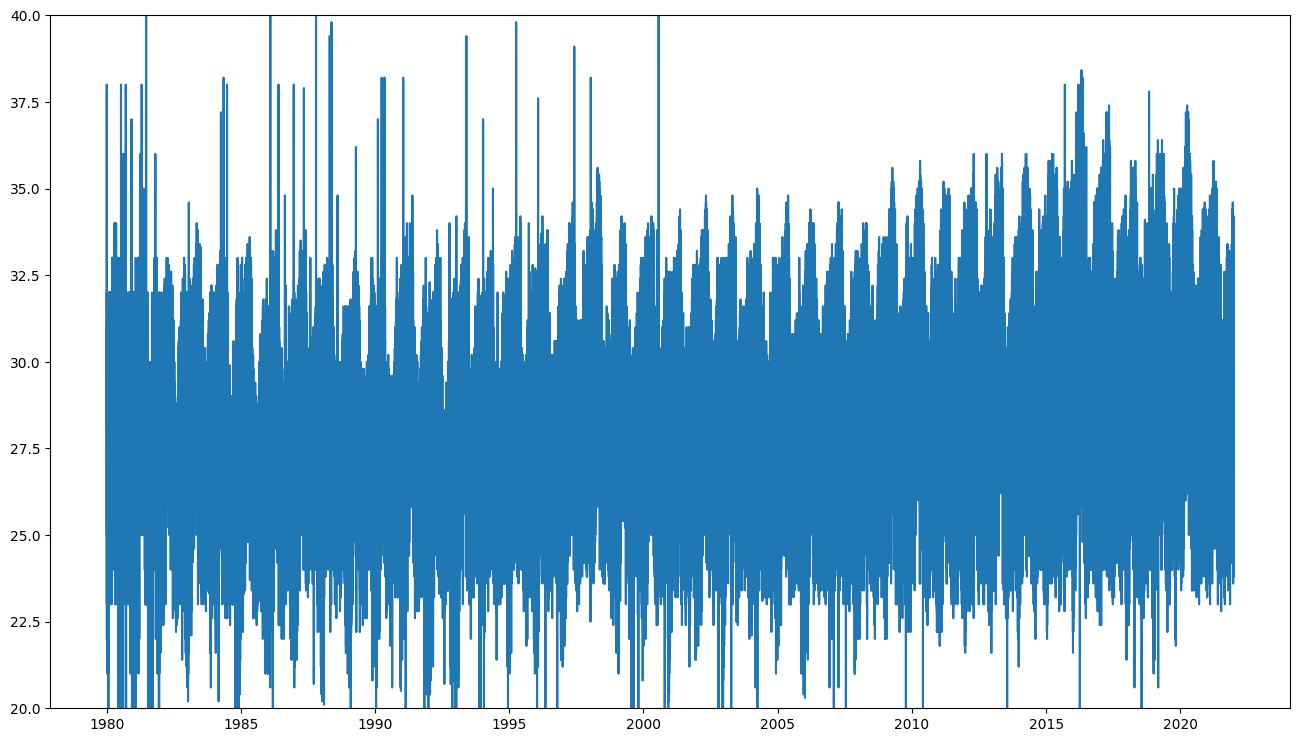

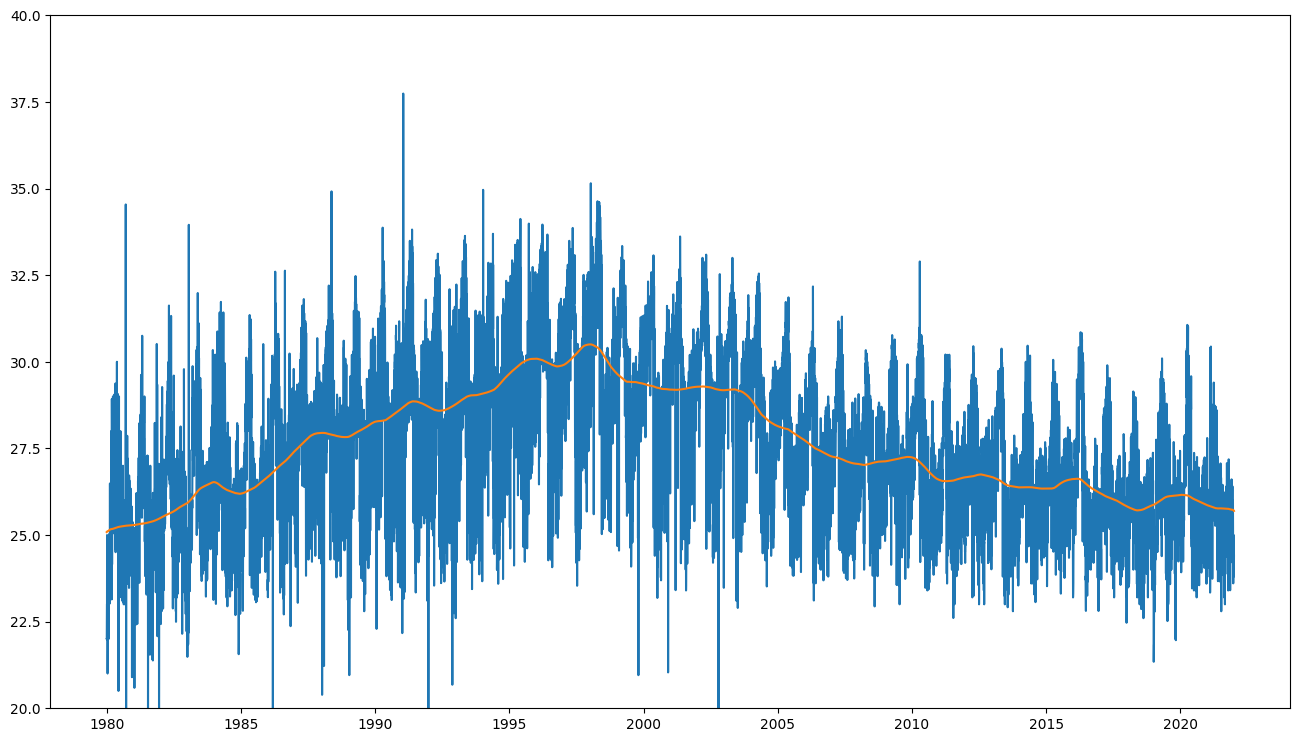

In [5]:
plt.figure(figsize=(16,9))
plt.plot(calicut_iso_time, calicut_temp)
plt.ylim(20,40)

plt.figure(figsize=(16,9))
plt.plot(binned_iso_time, inter_ctemp)
plt.plot(binned_iso_time, compon_0)
plt.ylim(20,40)

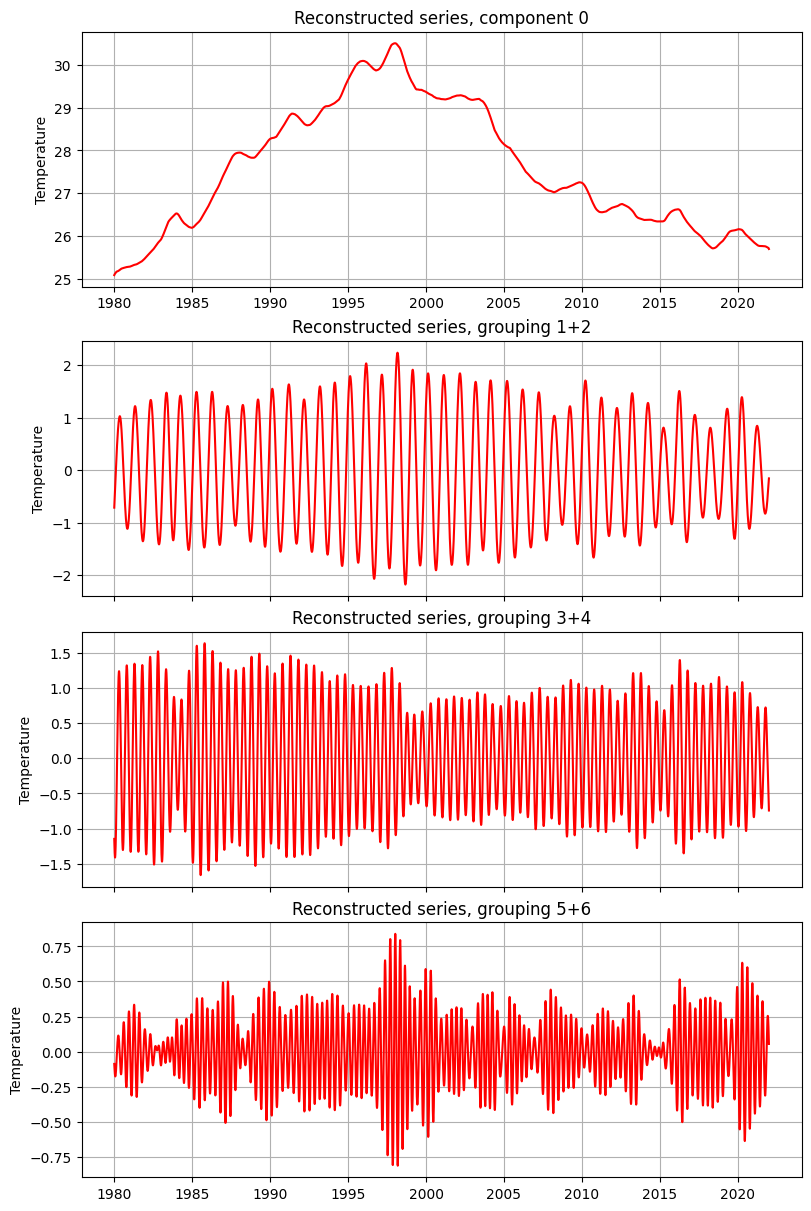

In [6]:
fig, ax = plt.subplots(4,1, constrained_layout=True, figsize=(8,12))
compon_0 = deembed_ts(np.matmul(np.expand_dims(u[:,0], axis=1), np.expand_dims(vh[0,:], axis=0)), N=N, L=L, K=K)*s[0]
ax[0].set_title("Reconstructed series, component 0")
ax[0].plot(binned_iso_time, compon_0, color='red')
ax[0].set_ylabel("Temperature")
ax[0].grid()

Nbegi = 1
plot_index = 1

for i in range(Nbegi,Nbegi+6,2):
    compon_a = deembed_ts(np.matmul(np.expand_dims(u[:,i], axis=1), np.expand_dims(vh[i,:], axis=0)), N=N, L=L, K=K)*s[i]
    compon_b = deembed_ts(np.matmul(np.expand_dims(u[:,i+1], axis=1), np.expand_dims(vh[i+1,:], axis=0)), N=N, L=L, K=K)*s[i+1]
    compon = compon_a+compon_b
    ax[plot_index].set_title("Reconstructed series, grouping "+str(i)+"+"+str(i+1))
    ax[plot_index].plot(binned_iso_time, compon, color='red')
    ax[plot_index].set_ylabel("Temperature")
    ax[plot_index].grid()
    if plot_index != 3 :
        ax[plot_index].get_xaxis().set_ticklabels([])
    plot_index = plot_index+1